In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.dropna()
data.head(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [264]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [265]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.dropna()

no_churn = data.Churn == 'No'
yes_churn = data.Churn == 'Yes'

no=no_churn.sum()
yes=yes_churn.sum()

#total_no=data.Churn==no_churn


print(no)
print(yes)



5174
1869


In [266]:
data.isnull().sum()

data.shape



(7043, 21)

In [267]:
data = [go.Bar(
            x=['No Churn','Yes Churn'],
            y=[no,yes]
    )]
iplot(data, filename='basic-bar')

In [268]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.dropna()

female = data.gender == 'Female'
male = data.gender == 'Male'

females= female.sum()
males = male.sum()

female_percent = females *100/(females+males)
male_percent = males *100/(females+males)

print(female_percent)
print(male_percent)

49.524350418855605
50.475649581144395


In [269]:
females= female.sum()
males = male.sum()

labels = ['Males','females']
values = [males, females]

trace = go.Pie(labels=labels, values=values)

iplot([trace], filename='basic_pie_chart')

In [270]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.dropna()

senior_yes = data.SeniorCitizen==1
seniors= senior_yes.sum()

senior_no = data.SeniorCitizen == 0
non_seniors = senior_no.sum()

dependants = data.Dependents == "Yes"
total_dependants = dependants.sum()

dependants_no = data.Dependents == "No"
no_dependants = dependants_no.sum()

In [271]:
print(seniors)
print(non_seniors)
print(total_dependants)
print(no_dependants)

1142
5901
2110
4933


In [272]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


trace0 = go.Bar(
    x=["females"],
    y=[seniors],
    name='Seniors',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=["males"],
    y=[non_seniors,],
    name='Not seniors',
    marker=dict(
        color='rgb(204,204,204)',
    )
)
trace2 = go.Bar(
    x=['Dependants'],
    y=[total_dependants],
    name='Dependants',
    marker=dict(
        color='rgb(49,130,189)',
    )
)
trace3 = go.Bar(
    x=['No Dependants'],
    y=[no_dependants],
    name=' No Dependants',
    marker=dict(
        color='rgb(204,204,204)',
    )
)
trace4 = go.Bar(
    x=['No Churn'],
    y=[no],
    name='No Churn',
    marker=dict(
        color='rgb(49,130,189)',
    )
)
trace5 = go.Bar(
    x=['Yes Churn'],
    y=[yes],
    name='Yes Churn',
    marker=dict(
        color='rgb(204,204,204)',
    )
)
data = [trace0,trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')

In [292]:
#Convert gender
data["gender"].replace(["Male","Female"],[1,0],inplace =True)


In [293]:
#Convert dependents
data["Dependents"].replace(["Yes","No"],[1,0],inplace =True)

In [294]:
#MultipleLines

data["MultipleLines"].replace(["Yes","No","No phone service"],[1,0,2],inplace = True)

In [295]:
#Partner

data["Partner"].replace(["Yes","No"],[1,0],inplace =True)

In [296]:
#PhoneService
data["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)

In [297]:
#INTERNET SERVICES

data["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)

In [298]:
#CONTARCT
data["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)


#TECH SUPPORT
data["TechSupport"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#ONLINE SECURITY
data["OnlineSecurity"].replace(["No","Yes","No internet service"],[0,1,2],inplace = True)


#DEVICE PROTECTION
data["DeviceProtection"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING MOVIES
data["StreamingMovies"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#STREAMING TV
data["StreamingTV"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#ONLINEBACKUP
data["OnlineBackup"].replace(["No","Yes","No internet service"],[0,1,2],inplace =True)


#PAPERLESS BILLING
data["PaperlessBilling"].replace(["No","Yes"],[0,1],inplace =True)


#PAYMENT METHOD
data["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)


#total Payment
data["TotalCharges"].replace([" "],[0],inplace = True)
data["TotalCharges"] = data["TotalCharges"].astype('float')



In [299]:
#churn
data["Churn"].replace(["No","Yes"],[0,1],inplace =True)

In [300]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,2,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,2,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [301]:
#dropping customer id columns Since that don't have any influence on target variable
data.drop(['customerID'],axis = 1,inplace = True)



In [286]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [302]:
#split dataset in features and target variable
#data.drop(["tenure","MonthlyCharges","TotalCharges","Churn"],axis = 1,inplace = True)
feature_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
X = data[feature_cols] # Features
y = data["Churn"] # Target variable

In [303]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [304]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 4)

In [305]:
#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [306]:
pred = clf.predict(X_test)

In [199]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.779460482725982


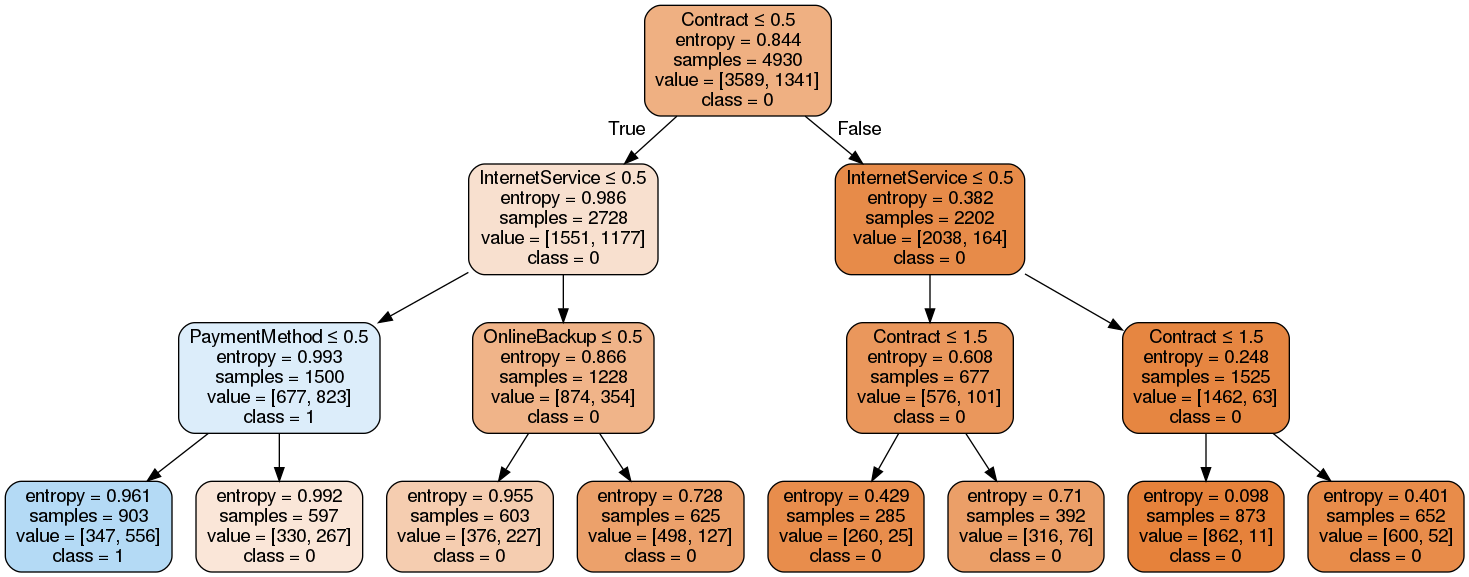

In [200]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import plotly.tools as tls

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn_Tree.png')
Image(graph.create_png())



In [ ]:
#Confident with the accuracy value